# P1 - Machine Learning
---

Datasets retirados do [Kaggle](www.kaggle.com): 
* [Heart Disease UCI](https://www.kaggle.com/spscientist/students-performance-in-exams) → Supervisionado. 
* [Students Performance in Exams](https://www.kaggle.com/spscientist/students-performance-in-exams) → Não-supervisionado. Apenas para treinamento de pré-processamento de dados.
* [Weather in Szeged 2006-2016](https://www.kaggle.com/budincsevity/szeged-weather)

## Importing libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessamento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer #para missing values
from sklearn.decomposition import PCA

# -------- Classificadores -----
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

#---- Model Selection
from sklearn.model_selection import StratifiedKFold
# Algorithm:
    # 1. Shuffle the dataset randomly.
    # 2. Split the dataset into k groups
    # 3. For each unique group:
        # 1. Take the group as a hold out or test data set
        # 2. Take the remaining groups as a training data set
        # 3. Fit a model on the training set and evaluate it on the test set
        # 4. Retain the evaluation score and discard the model
    # 4. Summarize the skill of the model using the sample of model evaluation scores


# ------- Métricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Loading datasets

In [2]:
heart_ds = pd.read_csv("./datasets/heart.csv")
students_ds = pd.read_csv("./datasets/StudentsPerformance.csv")
weather = pd.read_csv("./datasets/weatherHistory.csv")

## Preprocessing _Students Performance_ dataset 

Existem diversos atributos catagóricos e outros não preenchidos, o objetivo é transformá-los em numéricos.

![Pandas dtypes](./imgs/pandas_dtypes.png)

In [3]:
students_ds.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Função que transforma dados categóricos em discretos
def discretizing(dataset):
    df = dataset
    
    for i in range(df.shape[1]): # passando por todas as colunas do conjunto de dados
        if df.dtypes[i] == 'object': # se o dtype desta coluna for string
            categorical = np.unique(df.values[...,i])
            #print(categorical)
            aux = 0
            for j in categorical:
                df.replace(j,aux, inplace=True)
                aux = aux+1
    return(df)

In [5]:
# Após a discretização dos dados
new_students_ds = discretizing(students_ds)
new_students_ds.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


Extraindo algumas informações do dataset

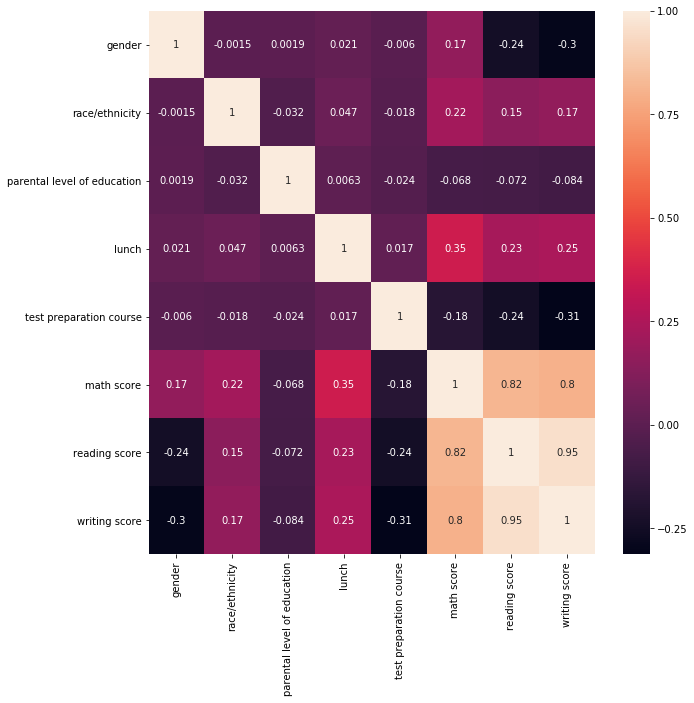

In [6]:
# Matriz de correlação dos dados
corr_students = new_students_ds.corr()

fig = plt.figure(figsize=(10,10))
sns.heatmap(corr_students, annot=True)

## Linear Regression on _Weather in Szeged_ dataset 

In [7]:
# Dropping NaN and "Loud Cover" column
weather = weather.dropna()
weather = weather.drop('Loud Cover', axis=1)
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


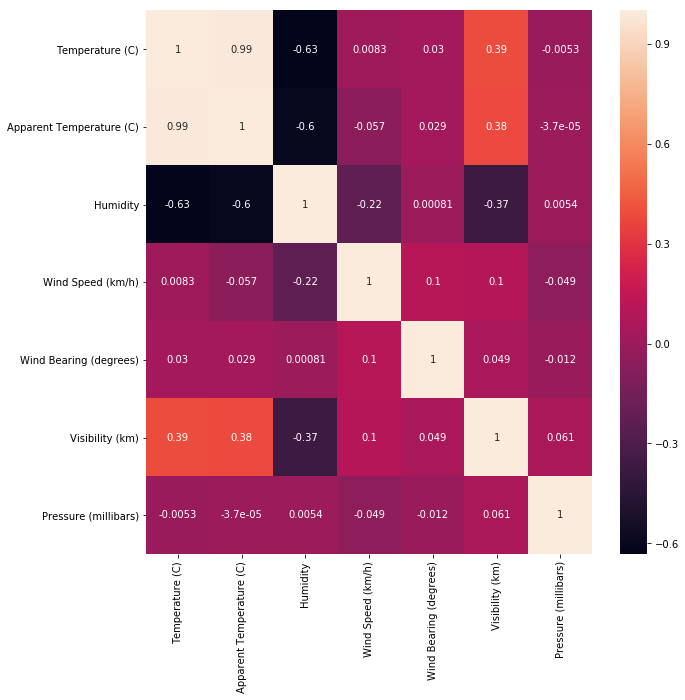

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,-0.005253
Apparent Temperature (C),0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,-0.000037
Humidity,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,0.005375
Wind Speed (km/h),0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,-0.049453
Wind Bearing (degrees),0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,-0.011629
Visibility (km),0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,0.061011
Pressure (millibars),-0.005253,-0.000037,0.005375,-0.049453,-0.011629,0.061011,1.000000


In [8]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(weather.corr(), annot=True)
plt.show()

weather.corr()

In [9]:
# Usando "Humidity" and "Temperature" to regression
# X=Humidity | Y=Temperature

X = np.array(weather.values[...,5:7]) # Humidity
Y = weather.values[...,3] # Temperature

(X_train, X_test, Y_train, Y_test) = train_test_split(X,Y, test_size=0.2, random_state=42)

#print(np.shape(Y))
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,Y_train)
Y_pred = linear_regressor.predict(X_test)

#print("Plano: y = %f + %f*x1 + %f*x2" % (linear_regressor.intercept_, linear_regressor.coef_[0], linear_regressor.coef_[1]))
print("MSE: ", mean_squared_error(Y_test, Y_pred))
print("R² Score: ", linear_regressor.score(X_test, Y_test))

MSE:  53.286746541823696
R² Score:  0.41560253494946114


In [10]:
scores = []
MSEs = []

for i in range(10):
    poly = PolynomialFeatures(degree=i+1)
    Xt = poly.fit_transform(X)
    (Xt_train, Xt_test, Yt_train, Yt_test) = train_test_split(Xt,Y, test_size=0.2, random_state=10)
    linear_regressor.fit(Xt_train,Yt_train)
    Yt_pred = linear_regressor.predict(Xt_test)
    scores.append(linear_regressor.score(Xt_test, Yt_test))
    MSEs.append(mean_squared_error(Yt_test, Yt_pred))

print(scores)
print(MSEs)

[0.4249364758512494, 0.4279271925076268, 0.43227296727884446, 0.4311957746037576, 0.4311500469392848, 0.433849928759351, 0.3895089361793052, 0.36483163760882986, -28.669179398300475, -159.77317236897272]
[52.68197041876679, 52.40798878055488, 52.009869323608264, 52.108551695661404, 52.11274083888804, 51.86540278281946, 55.927512030486675, 58.188216559137274, 2718.0142119499906, 14728.542422180535]


Observamos da análise de cima que o polinômio com _grau 6_ apresentou **maior score R²** e **menor MSE**.

### Análise de Boxplot

Mean 1: 53.28
Mean 2: 49.84
Mean 3: 39.554455445544555
-------------
Mediana 23.0
1o quartil [ 67  69  72  75  76  77  78  78  81  88  88  89  91  91  92  92  93  95
  96  97  97  97  98  99  99 140]


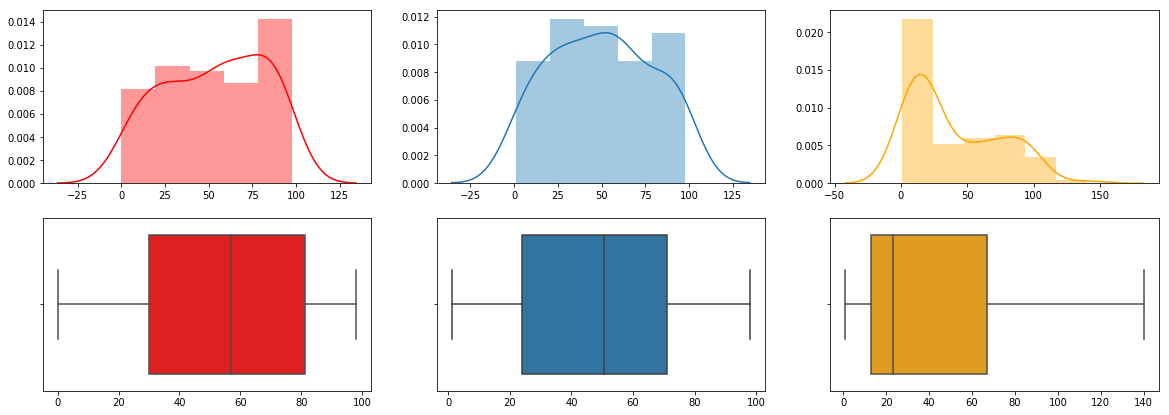

In [11]:
vec1 = np.random.randint(low=0, high=100, size=100)
vec2 = np.random.randint(low=0, high=100, size=100)
#--
vec3 = np.random.randint(low=0, high=30, size=60)
vec4 = np.random.randint(low=40, high=100, size=40)
vec5 = np.concatenate((vec3,vec4,[140]))


print("Mean 1:", np.mean(vec1))
print("Mean 2:", np.mean(vec2))
print("Mean 3:", np.mean(vec5))

print("-------------")
vec5 = np.sort(vec5)
print("Mediana", np.median(vec5))
print("1o quartil", vec5[75:])

# ---- Visualiação
fig, ax = plt.subplots(2,3, figsize=(20,7))
#linha 1 fig
sns.distplot(vec1, ax=ax[0,0], color='red')
sns.distplot(vec2, ax=ax[0,1])
sns.distplot(vec5, ax=ax[0,2], color='orange')
# linha 2 fig
sns.boxplot(vec1, ax=ax[1,0], color='red')
sns.boxplot(vec2, ax=ax[1,1])
sns.boxplot(vec5, ax=ax[1,2], color='orange')
plt.show()
#----------